In [1]:
import pandas as pd
import tensorflow as tf

time: 26.2 s


In [2]:
df = pd.read_csv('New_capstone_file.csv')

time: 2.48 s


In [3]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,diag_1,diag_2,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_ovrll_prcdrs,num_prvs_vists
0,Caucasian,Female,[0-10),6,25,1,1,1,Diabetes mellitus type 1,No Diagnosis Done,...,No,No,No,No,No,No,No,NO,41,0
1,Caucasian,Female,[10-20),1,1,7,3,18,Other Metabolic Disorders And Immunity Disorders,Diabetes mellitus type 1,...,No,No,No,No,No,Ch,Yes,>30,59,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,13,Pregnancy Disorders,Diabetes mellitus type 2,...,No,No,No,No,No,No,Yes,NO,16,3
3,Caucasian,Male,[30-40),1,1,7,2,16,Intestinal Infectious Diseases,Diabetes mellitus type 1,...,No,No,No,No,No,Ch,Yes,NO,45,0
4,Caucasian,Male,[40-50),1,1,7,1,8,Malignant Neoplasm Of Other And Unspecified Sites,Malignant Neoplasm Of Digestive Organs And Per...,...,No,No,No,No,No,Ch,Yes,NO,51,0


time: 193 ms


In [4]:
df.skew()

admission_type_id           1.591984
discharge_disposition_id    2.563067
admission_source_id         1.029935
time_in_hospital            1.133999
num_medications             1.326672
number_diagnoses           -0.876746
num_ovrll_prcdrs           -0.210995
num_prvs_vists              5.315210
dtype: float64

time: 2.29 s


In [5]:
sk_l = ['time_in_hospital',
'num_medications','number_diagnoses','num_ovrll_prcdrs','num_prvs_vists']

time: 3 ms


In [6]:
from scipy.stats import boxcox

time: 1.79 s


In [7]:
for i in sk_l:
    df[i] = list(boxcox(df[i]+1)[0])

time: 2.82 s


In [8]:
df.skew()

admission_type_id           1.591984
discharge_disposition_id    2.563067
admission_source_id         1.029935
time_in_hospital            0.012906
num_medications             0.018905
number_diagnoses           -0.137440
num_ovrll_prcdrs           -0.190099
num_prvs_vists              0.413960
dtype: float64

time: 3.06 s


time: 178 ms


In [9]:
import statsmodels.api

time: 2.77 s


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot_outliers_plot(df, columns=[]):
    """
       We Plot the outliers of non categorical columns in the data set
       Parameters :
       df : DataFrame
       columns : If we want only specific columns , we can use this list
       Returns :
       Boxplot of the columns
    """
    # Importing the Libraries required

    # Taking the columns in the data frame If columns list is empty
    if len(columns) == 0:
        columns = df.columns
    # Taking columns in columns list if columns list is not empty
    elif len(columns) != 0:
        columns = columns
    # Correct backend code
    else:
        raise ValueError('Something wrong in backend code here')
    # Taking column from columns list
    for column in columns:
        # The column should be present in DataFrame
        if column in df.columns:
            # We can only calculate outliers for non-categorical columns
            if df[column].dtype != 'O':
                print(column)
                sns.boxplot(df[column])
                plt.show()
            else:
                print('Cannot find Outliers for ', column,
                      'as it is a categorical column')
                print('\n')
        # Column should be in DataFrame
        elif column not in df.columns:
            raise ValueError('The column is not in the DataFrame')
        # Correct backend code
        else:
            raise ValueError('Something wrong in backend code here') 

time: 2.74 s


Cannot find Outliers for  race as it is a categorical column


Cannot find Outliers for  gender as it is a categorical column


Cannot find Outliers for  age as it is a categorical column


admission_type_id


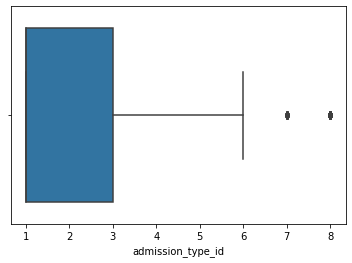

discharge_disposition_id


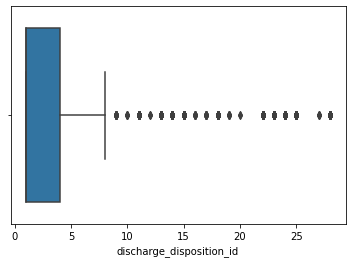

admission_source_id


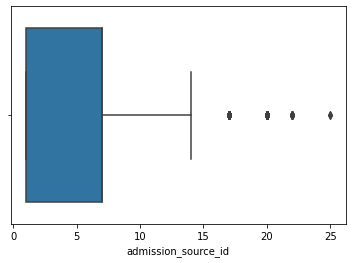

time_in_hospital


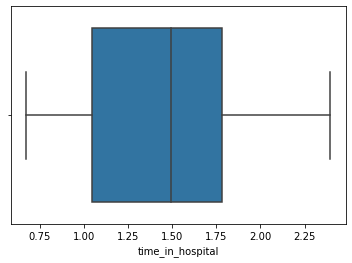

num_medications


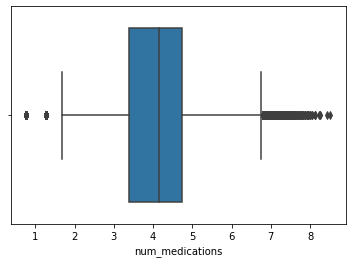

Cannot find Outliers for  diag_1 as it is a categorical column


Cannot find Outliers for  diag_2 as it is a categorical column


Cannot find Outliers for  diag_3 as it is a categorical column


number_diagnoses


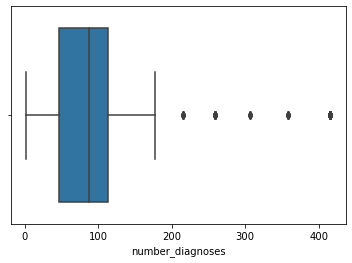

Cannot find Outliers for  max_glu_serum as it is a categorical column


Cannot find Outliers for  A1Cresult as it is a categorical column


Cannot find Outliers for  metformin as it is a categorical column


Cannot find Outliers for  repaglinide as it is a categorical column


Cannot find Outliers for  nateglinide as it is a categorical column


Cannot find Outliers for  chlorpropamide as it is a categorical column


Cannot find Outliers for  glimepiride as it is a categorical column


Cannot find Outliers for  acetohexamide as it is a categorical column


Cannot find Outliers for  glipizide as it is a categorical column


Cannot find Outliers for  glyburide as it is a categorical column


Cannot find Outliers for  tolbutamide as it is a categorical column


Cannot find Outliers for  pioglitazone as it is a categorical column


Cannot find Outliers for  rosiglitazone as it is a categorical column


Cannot find Outliers for  acarbose as it is a categorical column


Cannot find Outliers 

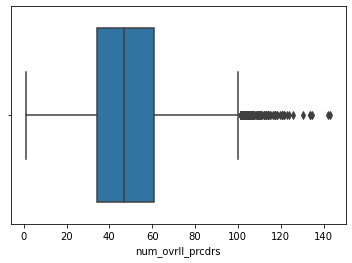

num_prvs_vists


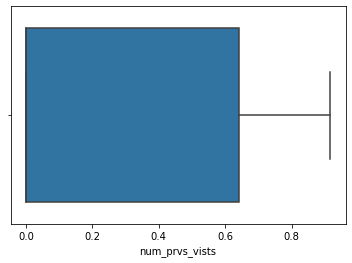

time: 27.5 s


In [11]:
boxplot_outliers_plot(df)

In [12]:
sk_l

['time_in_hospital',
 'num_medications',
 'number_diagnoses',
 'num_ovrll_prcdrs',
 'num_prvs_vists']

time: 8 ms


In [13]:
s_df = df[sk_l]
s_df

,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
0,0.671436,0.762794,1.817283,42.757811,0.000000
1,1.301253,4.512864,113.322272,61.835981,0.000000
2,1.044738,3.860123,47.157593,16.484523,0.718183
3,1.044738,4.268823,65.513476,46.988444,0.000000
4,0.671436,3.006707,32.226094,53.344494,0.000000
...,...,...,...,...,...
101761,1.301253,4.268823,113.322272,53.344494,0.000000
101762,1.651416,4.512864,113.322272,37.477991,0.487716
101763,0.671436,3.201002,258.420595,55.465659,0.487716
101764,2.151036,4.846015,113.322272,49.105837,0.487716


time: 59 ms


In [14]:
from sklearn.preprocessing import StandardScaler

time: 120 ms


In [15]:
ss = StandardScaler()

time: 16 ms


In [16]:
s_s_df = ss.fit_transform(s_df)

time: 87 ms


In [17]:
s_s_df = pd.DataFrame(s_s_df,columns=sk_l)

time: 8 ms


In [18]:
s_s_df

,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
0,-1.632460,-3.304858,-2.125874,-0.177270,-0.873587
1,-0.271144,0.408817,0.865090,0.733542,-0.873587
2,-0.825587,-0.237590,-0.909684,-1.431584,1.368394
3,-0.825587,0.167145,-0.417314,0.024705,-0.873587
4,-1.632460,-1.082723,-1.310201,0.328150,-0.873587
...,...,...,...,...,...
101761,-0.271144,0.167145,0.865090,0.328150,-0.873587
101762,0.485715,0.408817,0.865090,-0.429334,0.648937
101763,-1.632460,-0.890313,4.757148,0.429416,0.648937
101764,1.565616,0.738735,0.865090,0.125792,0.648937


time: 74 ms


In [19]:
df.drop(sk_l,axis=1,inplace=True)

time: 96 ms


In [20]:
df = pd.concat([df,s_s_df],axis=1)

time: 110 ms


In [21]:
df[df['gender']=='Unknown/Invalid'].index.tolist()

[30506, 75551, 82573]

time: 213 ms


In [22]:
df.drop(df[df['gender']=='Unknown/Invalid'].index.tolist(),axis=0,inplace=True)

time: 265 ms


In [23]:
df.gender = df.gender.map({'Female':0,'Male':1})

time: 164 ms


In [24]:
df.change = df.change.map({'No':0,'Ch':1})

time: 137 ms


In [25]:
df.diabetesMed = df.diabetesMed.map({'Yes':0,'No':1})

time: 65 ms


In [26]:
df.diabetesMed.value_counts()

0    78361
1    23402
Name: diabetesMed, dtype: int64

time: 22 ms


In [27]:
l_d = ['acarbose','acetohexamide','chlorpropamide','citoglipton','examide','glimepiride-pioglitazone','glipizide-metformin','glyburide-metformin','metformin-pioglitazone','metformin-rosiglitazone','miglitol','tolazamide','troglitazone','tolbutamide','nateglinide','glyburide']

time: 8 ms


In [28]:
df.drop(l_d,inplace=True,axis=1)

time: 90 ms


In [29]:
X = df.drop('readmitted',axis=1)
y = df['readmitted']

time: 90 ms


In [30]:
X.skew()

gender                      0.150838
admission_type_id           1.591977
discharge_disposition_id    2.563169
admission_source_id         1.029942
change                      0.152661
diabetesMed                 1.283420
time_in_hospital            0.012915
num_medications             0.018932
number_diagnoses           -0.137451
num_ovrll_prcdrs           -0.190096
num_prvs_vists              0.413910
dtype: float64

time: 1.26 s


In [31]:
y.value_counts()

NO     54861
>30    35545
<30    11357
Name: readmitted, dtype: int64

time: 145 ms


In [32]:
y = y.map({'NO':0,'>30':1,'<30':1})

time: 69 ms


cat_cols = ['diag_1', 'diag_2', 'diag_3']

In [33]:
cat_cols = X.describe(include='O').columns.tolist()

time: 1.53 s


In [34]:
from sklearn.base import BaseEstimator
class MeanEncoding(BaseEstimator):

    """   In Mean Encoding we take the number
    of labels into account along with the target variable
    to encode the labels into machine comprehensible values    """

    def __init__(self, feature, C=0.1):
        self.C = C
        self.feature = feature

    def fit(self, X_train, y_train):

        df = pd.DataFrame(
            {'feature': X_train[self.feature], 'target': y_train}).dropna()

        self.global_mean = df.target.mean()
        mean = df.groupby('feature').target.mean()
        size = df.groupby('feature').target.size()

        self.encoding = (self.global_mean * self.C +
                         mean * size) / (self.C + size)

    def transform(self, X_test):

        X_test[self.feature] = X_test[self.feature].map(
            self.encoding).fillna(self.global_mean).values

        return X_test

    def fit_transform(self, X_train, y_train):

        df = pd.DataFrame(
            {'feature': X_train[self.feature], 'target': y_train}).dropna()

        self.global_mean = df.target.mean()
        mean = df.groupby('feature').target.mean()
        size = df.groupby('feature').target.size()
        self.encoding = (self.global_mean * self.C +
                         mean * size) / (self.C + size)

        X_train[self.feature] = X_train[self.feature].map(
            self.encoding).fillna(self.global_mean).values

        return X_train

for f in cat_cols + ['admission_type_id','discharge_disposition_id','admission_source_id']:
    me = MeanEncoding(f, C=0.01 * len(X[f].unique()))
    me.fit(X, y)
    X = me.transform(X)

time: 3.89 s


In [35]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
0,0.464999,0,0.180299,0.532412,0.473202,0.431944,0.485229,0.288254,0.301602,0.459514,...,0.459263,0.459418,0.436999,0,1,-1.632460,-3.304858,-2.125874,-0.177270,-0.873587
1,0.464999,0,0.382066,0.472883,0.450242,0.493756,0.458419,0.513533,0.452887,0.459514,...,0.459263,0.459418,0.515376,1,0,-0.271144,0.408817,0.865090,0.733542,-0.873587
2,0.457522,0,0.450212,0.472883,0.450242,0.493756,0.310664,0.414807,0.461196,0.459514,...,0.459263,0.459418,0.436999,0,0,-0.825587,-0.237590,-0.909684,-1.431584,1.368394
3,0.464999,1,0.426756,0.472883,0.450242,0.493756,0.512721,0.513533,0.427601,0.459514,...,0.459263,0.459418,0.515376,1,0,-0.825587,0.167145,-0.417314,0.024705,-0.873587
4,0.464999,1,0.444502,0.472883,0.450242,0.493756,0.320982,0.488739,0.434835,0.459514,...,0.459263,0.459418,0.451068,1,0,-1.632460,-1.082723,-1.310201,0.328150,-0.873587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.457522,1,0.481240,0.472883,0.498924,0.493756,0.485229,0.393105,0.491480,0.459514,...,0.459263,0.459418,0.527909,1,0,-0.271144,0.167145,0.865090,0.328150,-0.873587
101762,0.457522,0,0.482700,0.472883,0.468709,0.394165,0.471010,0.460311,0.464952,0.459514,...,0.459263,0.459418,0.451068,0,0,0.485715,0.408817,0.865090,-0.429334,0.648937
101763,0.464999,1,0.481240,0.472883,0.450242,0.493756,0.440711,0.460306,0.504323,0.459514,...,0.459263,0.459418,0.527909,1,0,-1.632460,-0.890313,4.757148,0.429416,0.648937
101764,0.464999,0,0.482700,0.460931,0.498924,0.493756,0.494994,0.447715,0.445188,0.459514,...,0.479857,0.459418,0.515376,1,0,1.565616,0.738735,0.865090,0.125792,0.648937


time: 621 ms


In [36]:
X.describe()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,101763.000000,101763.000000,101763.000000
mean,0.460895,0.462398,0.460895,0.460895,0.460897,0.460899,0.460939,0.460967,0.460963,0.460894,...,0.460894,0.460895,0.460894,0.461946,0.229966,0.000020,-5.907783e-07,0.000020,0.000012,0.000026
std,0.013876,0.498587,0.024544,0.030641,0.076501,0.051407,0.065928,0.051090,0.051158,0.010953,...,0.006368,0.008485,0.034123,0.498552,0.420813,0.999986,1.000002e+00,0.999995,1.000001,1.000008
min,0.352583,0.000000,0.180299,0.001749,0.000073,0.036107,0.084347,0.051413,0.064060,0.454371,...,0.459263,0.310414,0.436999,0.000000,0.000000,-1.632460,-3.304858e+00,-2.125874,-2.170557,-0.873587
25%,0.464999,0.000000,0.444502,0.460931,0.450242,0.431944,0.426355,0.430581,0.428327,0.459514,...,0.459263,0.459418,0.436999,0.000000,0.000000,-0.825587,-7.114438e-01,-0.909684,-0.580334,-0.873587
50%,0.464999,0.000000,0.462548,0.472883,0.450242,0.493756,0.467731,0.460311,0.454620,0.459514,...,0.459263,0.459418,0.451068,0.000000,0.000000,0.148889,3.846507e-02,0.172531,0.024705,-0.873587
75%,0.464999,1.000000,0.481240,0.472883,0.498924,0.493756,0.510956,0.502462,0.504323,0.459514,...,0.459263,0.459418,0.451068,1.000000,0.000000,0.766108,6.326173e-01,0.865090,0.682822,1.133159
max,0.464999,1.000000,0.482700,0.532412,0.729052,0.639563,0.882071,0.713996,0.774307,0.555377,...,0.533874,0.487949,0.527909,1.000000,1.000000,2.095259,4.370038e+00,8.972998,4.615393,1.988036


time: 1.31 s


In [37]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,time_in_hospital,num_medications,number_diagnoses,num_ovrll_prcdrs,num_prvs_vists
0,0.464999,0,0.180299,0.532412,0.473202,0.431944,0.485229,0.288254,0.301602,0.459514,...,0.459263,0.459418,0.436999,0,1,-1.632460,-3.304858,-2.125874,-0.177270,-0.873587
1,0.464999,0,0.382066,0.472883,0.450242,0.493756,0.458419,0.513533,0.452887,0.459514,...,0.459263,0.459418,0.515376,1,0,-0.271144,0.408817,0.865090,0.733542,-0.873587
2,0.457522,0,0.450212,0.472883,0.450242,0.493756,0.310664,0.414807,0.461196,0.459514,...,0.459263,0.459418,0.436999,0,0,-0.825587,-0.237590,-0.909684,-1.431584,1.368394
3,0.464999,1,0.426756,0.472883,0.450242,0.493756,0.512721,0.513533,0.427601,0.459514,...,0.459263,0.459418,0.515376,1,0,-0.825587,0.167145,-0.417314,0.024705,-0.873587
4,0.464999,1,0.444502,0.472883,0.450242,0.493756,0.320982,0.488739,0.434835,0.459514,...,0.459263,0.459418,0.451068,1,0,-1.632460,-1.082723,-1.310201,0.328150,-0.873587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.457522,1,0.481240,0.472883,0.498924,0.493756,0.485229,0.393105,0.491480,0.459514,...,0.459263,0.459418,0.527909,1,0,-0.271144,0.167145,0.865090,0.328150,-0.873587
101762,0.457522,0,0.482700,0.472883,0.468709,0.394165,0.471010,0.460311,0.464952,0.459514,...,0.459263,0.459418,0.451068,0,0,0.485715,0.408817,0.865090,-0.429334,0.648937
101763,0.464999,1,0.481240,0.472883,0.450242,0.493756,0.440711,0.460306,0.504323,0.459514,...,0.459263,0.459418,0.527909,1,0,-1.632460,-0.890313,4.757148,0.429416,0.648937
101764,0.464999,0,0.482700,0.460931,0.498924,0.493756,0.494994,0.447715,0.445188,0.459514,...,0.479857,0.459418,0.515376,1,0,1.565616,0.738735,0.865090,0.125792,0.648937


time: 275 ms


In [38]:
X.shape

(101763, 25)

time: 16 ms


In [39]:
X_constant = statsmodels.api.add_constant(X)

time: 152 ms


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]


time: 40.6 s


In [41]:
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
race,1.010756
gender,1.009490
age,1.059054
admission_type_id,1.225842
discharge_disposition_id,1.023919
admission_source_id,1.169879
diag_1,1.150221
diag_2,1.136071
diag_3,1.157592
max_glu_serum,1.028957


time: 30 ms


In [42]:
len(X.columns)

25

time: 16 ms


import imblearn

smote = imblearn.over_sampling.SMOTE(random_state=96)

X_rs,y_rs = smote.fit_resample(X,y)

X_rs.shape

y_rs.value_counts()

df_new = pd.concat([X_rs,y_rs],axis=1)

df_new

In [43]:
pd.concat([X,y],axis=1).to_csv('Capstone_model_2.csv',index=False)

time: 27.6 s


In [44]:
y.value_counts()

0    54861
1    46902
Name: readmitted, dtype: int64

time: 30 ms
